# Processing

Импорт и парсинг CSV

In [1]:
from pathlib import Path
from scripts.utils import parse_hgvs_file

input_csv = Path('/home/nikolenko/work/mipt/EvolvePro/data/dms/activity/ube2i.csv')
output_file = parse_hgvs_file(input_csv)

Save to /home/nikolenko/work/mipt/EvolvePro/data/dms/activity/ube2i_parsed.csv


Обработка датасета 

Cutoff values: [0.3]
Number above cutoff: [1643]
Fractions above cutoff: [0.543859649122807]
Process dataset done! [0.543859649122807]


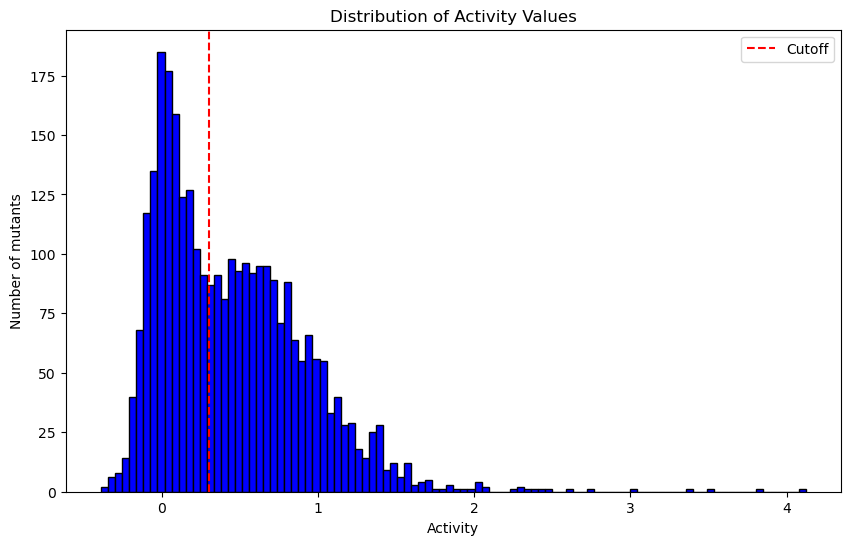

In [2]:
from evolvepro.src.process import process_dataset
import matplotlib.pyplot as plt

parsed_csv = '/home/nikolenko/work/mipt/EvolvePro/data/dms/activity/ube2i_parsed.csv'
wt_fasta = '/home/nikolenko/work/mipt/EvolvePro/data/dms/wt_fasta/ube2i_WT.fasta'
out_dir = '/home/nikolenko/work/mipt/EvolvePro/data/output/ube2i'

df, frac = process_dataset(
    file_path=parsed_csv,          
    dataset_name='ube2i',          
    wt_fasta_path=wt_fasta,       
    activity_column='Activity',    
    cutoff_value=0.3,
    output_dir=out_dir,
    sheet_name=None,
    cutoff_rule='greater_than',
    drop_columns=False
)

print("Process dataset done!", frac)



plt.figure(figsize=(10, 6))
plt.hist(df['Activity'], bins=100, color='blue', edgecolor='black')
plt.xlabel('Activity')
plt.ylabel('Number of mutants')
plt.title('Distribution of Activity Values')
plt.axvline(x=0.3, color='red', linestyle='--', label='Cutoff')
plt.legend()
plt.show()


In [3]:
import pandas as pd
from pathlib import Path
from scripts.utils import read_fasta_as_dict

csv_path = Path("/home/nikolenko/work/mipt/EvolvePro/data/output/ube2i/ube2i_labels.csv")
fasta_path = Path("/home/nikolenko/work/mipt/EvolvePro/data/output/ube2i/ube2i.fasta")

df_labels = pd.read_csv(csv_path)

variant2seq = read_fasta_as_dict(fasta_path)

df_labels["full_seq"] = df_labels["variant"].map(variant2seq)
df_labels.dropna(subset=["full_seq"], inplace=True)

print(len(variant2seq), "mutant sequences read from fasta.")
display(df_labels.head(3))

3021 mutant sequences read from fasta.


,Position,WT_Residue,Mut_Residue,Activity,variant,activity,activity_scaled,activity_binary,full_seq
0,73,P,Q,-0.026176,P73Q,-0.026176,0.080156,0,MSGIALSRLAQERKAWRKDHPFGFVAVPTKNPDGTMNLMNWECAIP...
1,137,Y,V,-0.115652,Y137V,-0.115652,0.060317,0,MSGIALSRLAQERKAWRKDHPFGFVAVPTKNPDGTMNLMNWECAIP...
2,27,V,D,-0.063647,V27D,-0.063647,0.071848,0,MSGIALSRLAQERKAWRKDHPFGFVADPTKNPDGTMNLMNWECAIP...


# Считаем ESM

In [4]:
#!CUDA_VISIBLE_DEVICES=4 ~/miniforge/envs/plm/bin/python ../evolvepro/plm/esm/extract.py esm2_t36_3B_UR50D ../data/output/ube2i/ube2i.fasta ../data/output/ube2i/embeddings/markin_esm2_t36_3B_UR50D --toks_per_batch 3 --include mean --concatenate_dir ../data/output/ube2i/embeddings

In [1]:
import pandas as pd

df_labels = pd.read_csv("../data/output/ube2i/ube2i_labels.csv")

df_embeddings = pd.read_csv("../data/output/ube2i/embeddings/ube2i_esm2_t36_3B_UR50D.csv", index_col=0)

common_variants = set(df_labels['variant']).intersection(df_embeddings.index)
df_labels = df_labels[df_labels['variant'].isin(common_variants)].copy()
df_embeddings = df_embeddings.loc[list(common_variants)].copy()

df_labels = df_labels.sort_values(by="variant").reset_index(drop=True)
df_embeddings = df_embeddings.loc[df_labels["variant"]]

In [2]:
df_embeddings

,0,1,2,3,4,5,6,7,8,9,...,2550,2551,2552,2553,2554,2555,2556,2557,2558,2559
A106C,-0.022277,0.004915,-0.072860,-0.003199,-0.047298,0.014309,-0.067469,0.033179,0.061972,-0.036770,...,0.084227,-0.039576,0.002541,0.036450,0.085772,-0.008776,0.003003,0.059011,-0.079439,-0.003164
A106D,-0.022460,0.001864,-0.081088,-0.001586,-0.048670,0.011884,-0.066806,0.032914,0.062164,-0.037159,...,0.080157,-0.041782,0.004087,0.037906,0.083763,-0.010247,0.002781,0.059760,-0.081081,-0.001844
A106E,-0.023579,0.002933,-0.080407,-0.001708,-0.048968,0.010980,-0.065958,0.034628,0.060709,-0.037491,...,0.079170,-0.040567,0.002745,0.037303,0.081596,-0.009391,0.002604,0.062161,-0.083442,-0.002340
A106F,-0.021818,0.005486,-0.075436,-0.002137,-0.043814,0.015467,-0.068205,0.033942,0.061566,-0.035722,...,0.080864,-0.039225,0.000303,0.038805,0.085796,-0.009315,0.000588,0.058144,-0.078448,-0.004774
A106G,-0.021135,0.001302,-0.080015,-0.000666,-0.048942,0.008136,-0.070300,0.026761,0.060044,-0.038048,...,0.081514,-0.043859,0.002992,0.039277,0.085774,-0.012800,0.001664,0.059827,-0.081495,-0.002680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Y87R,-0.022984,0.000642,-0.072674,-0.002067,-0.042827,0.015967,-0.068410,0.030673,0.063704,-0.031088,...,0.081968,-0.041569,0.002766,0.035580,0.086064,-0.007402,0.005676,0.054403,-0.080723,0.000339
Y87S,-0.017870,-0.001259,-0.067876,-0.002294,-0.047070,0.015537,-0.069501,0.027929,0.067398,-0.032518,...,0.080874,-0.044037,0.004019,0.038795,0.081002,-0.005048,0.006011,0.058454,-0.082250,0.000780
Y87T,-0.019121,-0.001160,-0.068976,-0.002222,-0.046146,0.016808,-0.067429,0.030795,0.065166,-0.031269,...,0.079254,-0.041738,0.002966,0.039225,0.080772,-0.005747,0.001562,0.059461,-0.082431,0.002477
Y87V,-0.020059,-0.002910,-0.069017,-0.005024,-0.046167,0.018632,-0.066767,0.029060,0.065707,-0.031828,...,0.079998,-0.042261,0.001913,0.037842,0.082841,-0.005239,0.000746,0.057352,-0.080074,0.003395


# PCA UMAP TSNE

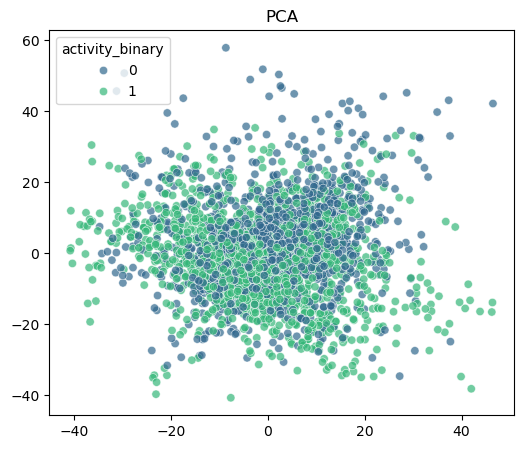

In [6]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = df_embeddings.values
y_bin = df_labels["activity_binary"].values
X_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components=20)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(6,5))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y_bin, palette="viridis", alpha=0.7)
plt.title("PCA")
plt.legend(title="activity_binary")
plt.show()


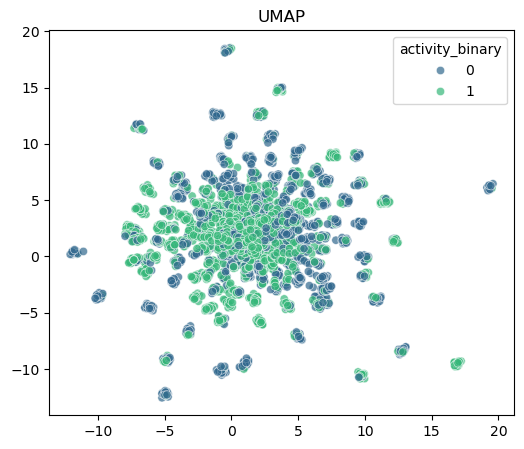

In [24]:
import umap

reducer = umap.UMAP(n_neighbors=20, min_dist=0.7, n_components=2, n_jobs=-1)
X_umap = reducer.fit_transform(X_scaled)

plt.figure(figsize=(6,5))
sns.scatterplot(x=X_umap[:,0], y=X_umap[:,1], hue=y_bin, palette="viridis", alpha=0.7)
plt.title("UMAP")
plt.legend(title="activity_binary")
plt.show()


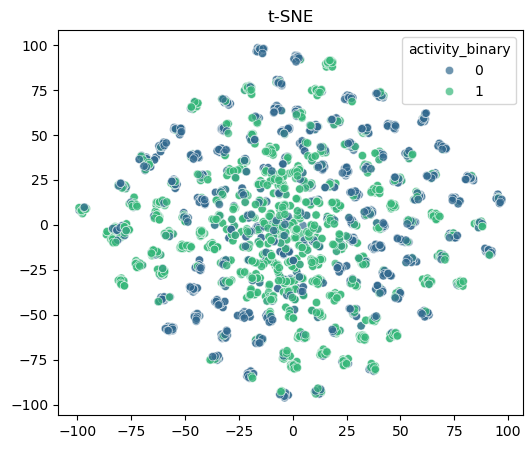

In [25]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, learning_rate="auto", init="pca", perplexity=10, n_jobs=-1)
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(6,5))
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=y_bin, palette="viridis", alpha=0.7)
plt.title("t-SNE")
plt.legend(title="activity_binary")
plt.show()

# VAE

In [1]:
import wandb
from pytorch_lightning.loggers import WandbLogger
from pytorch_lightning.callbacks import EarlyStopping
import pytorch_lightning as pl
import torch.nn.functional as F
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

In [10]:
df_labels = pd.read_csv("../data/output/ube2i/ube2i_labels.csv")
df_embeddings = pd.read_csv("../data/output/ube2i/embeddings/ube2i_esm2_t36_3B_UR50D.csv", index_col=0)

common_variants = set(df_labels['variant']).intersection(df_embeddings.index)
df_labels = df_labels[df_labels['variant'].isin(common_variants)].copy()
df_embeddings = df_embeddings.loc[list(common_variants)].copy()
df_labels = df_labels.sort_values(by="variant").reset_index(drop=True)
df_embeddings = df_embeddings.loc[df_labels["variant"]]

X = df_embeddings.values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_val = train_test_split(X_scaled, test_size=0.2, random_state=42, shuffle=True)

tensor_train = torch.tensor(X_train, dtype=torch.float32)
tensor_val   = torch.tensor(X_val,   dtype=torch.float32)
train_dataset = TensorDataset(tensor_train)
val_dataset   = TensorDataset(tensor_val)

train_loader = DataLoader(train_dataset, batch_size=256, shuffle=True, num_workers=4)
val_loader   = DataLoader(val_dataset,   batch_size=256, shuffle=False, num_workers=4)


In [4]:
# %% [markdown]
# # 2) Модель VAE с KL warm-up и beta-VAE

import pytorch_lightning as pl
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class Encoder(nn.Module):
    def __init__(self, input_dim, latent_dim):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.mu = nn.Linear(64, latent_dim)
        self.logvar = nn.Linear(64, latent_dim)
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return self.mu(x), self.logvar(x)

class Decoder(nn.Module):
    def __init__(self, latent_dim, output_dim):
        super().__init__()
        self.fc1 = nn.Linear(latent_dim, 64)
        self.fc2 = nn.Linear(64, 128)
        self.fc3 = nn.Linear(128, output_dim)
    def forward(self, z):
        z = F.relu(self.fc1(z))
        z = F.relu(self.fc2(z))
        return self.fc3(z)

class LitVAE(pl.LightningModule):
    def __init__(self, input_dim=2560, latent_dim=2, lr=1e-3, beta=1.0, warmup_epochs=10):
        super().__init__()
        self.save_hyperparameters()
        self.encoder = Encoder(input_dim, latent_dim)
        self.decoder = Decoder(latent_dim, input_dim)

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def compute_vae_loss(self, x, x_recon, mu, logvar):
        recon_loss = F.mse_loss(x_recon, x, reduction='sum')
        kld = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
        return recon_loss, kld

    def forward(self, x):
        mu, logvar = self.encoder(x)
        z = self.reparameterize(mu, logvar)
        x_recon = self.decoder(z)
        return x_recon, mu, logvar

    def training_step(self, batch, batch_idx):
        x = batch[0]
        x_recon, mu, logvar = self(x)
        r_loss, k_loss = self.compute_vae_loss(x, x_recon, mu, logvar)
        epoch = float(self.current_epoch)
        kld_weight = min(1.0, epoch / self.hparams.warmup_epochs)  
        total_loss = r_loss + kld_weight * self.hparams.beta * k_loss
        self.log("train/recon_loss", r_loss, prog_bar=True, on_epoch=True)
        self.log("train/kl_loss", k_loss, on_epoch=True)
        self.log("train/total_loss", total_loss, prog_bar=True, on_epoch=True)
        self.log("train/kld_weight", kld_weight, on_epoch=True)
        return total_loss

    def validation_step(self, batch, batch_idx):
        x = batch[0]
        x_recon, mu, logvar = self(x)
        r_loss, k_loss = self.compute_vae_loss(x, x_recon, mu, logvar)
        epoch = float(self.current_epoch)
        kld_weight = min(1.0, epoch / self.hparams.warmup_epochs)
        total_loss = r_loss + kld_weight * self.hparams.beta * k_loss
        self.log("val/recon_loss", r_loss, prog_bar=True, on_epoch=True)
        self.log("val/kl_loss", k_loss, on_epoch=True)
        self.log("val/total_loss", total_loss, prog_bar=True, on_epoch=True)
        self.log("val/kld_weight", kld_weight, on_epoch=True)
        return total_loss

    def configure_optimizers(self):
        return optim.Adam(self.parameters(), lr=self.hparams.lr)


In [14]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ['CUDA_VISIBLE_DEVICES'] = '4'
torch.set_float32_matmul_precision('high')

wandb.init(project="EvolvePro", name="VAE_experiment", dir="../log/", settings=wandb.Settings(silent=True))
wandb_logger = WandbLogger(project="EvolvePro", name="VAE_experiment", save_dir="../log/", log_model=False)

early_stop = EarlyStopping(monitor="val/total_loss", patience=10, mode="min", verbose=True)

latent_dim = 5

model = LitVAE(input_dim=X_scaled.shape[1], latent_dim=latent_dim, lr=1e-3)

trainer = pl.Trainer(
    max_epochs=20,
    accelerator="gpu",
    devices=1,
    callbacks=[early_stop],
    logger=wandb_logger,
    enable_checkpointing=False,
    enable_progress_bar=True,
    enable_model_summary=True
)
trainer.fit(model, train_loader, val_loader)
wandb.finish()

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/home/nikolenko/miniforge/envs/evolvepro/lib/python3.11/site-packages/pytorch_lightning/loggers/wandb.py:397: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [4]

  | Name    | Type    | Params | Mode 
--------------------------------------------
0 | encoder | Encoder | 336 K  | train
1 | decoder | Decoder | 338 K  | train
--------------------------------------------
675 K     Trainable params
0         Non-trainable params
675 K     Total params
2.703     Total estimated model params size (MB)
9         Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/home/nikolenko/miniforge/envs/evolvepro/lib/python3.11/site-packages/pytorch_lightning/loops/fit_loop.py:310: The number of training batches (38) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val/total_loss improved. New best score: 141948.750


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val/total_loss improved by 20565.766 >= min_delta = 0.0. New best score: 121382.984


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val/total_loss improved by 4525.703 >= min_delta = 0.0. New best score: 116857.281


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val/total_loss improved by 2572.523 >= min_delta = 0.0. New best score: 114284.758


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val/total_loss improved by 2064.883 >= min_delta = 0.0. New best score: 112219.875


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val/total_loss improved by 1694.758 >= min_delta = 0.0. New best score: 110525.117


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val/total_loss improved by 1214.844 >= min_delta = 0.0. New best score: 109310.273


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val/total_loss improved by 1061.906 >= min_delta = 0.0. New best score: 108248.367


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val/total_loss improved by 1345.383 >= min_delta = 0.0. New best score: 106902.984


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val/total_loss improved by 851.438 >= min_delta = 0.0. New best score: 106051.547


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val/total_loss improved by 951.820 >= min_delta = 0.0. New best score: 105099.727


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val/total_loss improved by 686.766 >= min_delta = 0.0. New best score: 104412.961


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val/total_loss improved by 735.836 >= min_delta = 0.0. New best score: 103677.125


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val/total_loss improved by 1260.180 >= min_delta = 0.0. New best score: 102416.945


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val/total_loss improved by 941.180 >= min_delta = 0.0. New best score: 101475.766


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val/total_loss improved by 733.859 >= min_delta = 0.0. New best score: 100741.906


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val/total_loss improved by 680.641 >= min_delta = 0.0. New best score: 100061.266


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val/total_loss improved by 776.359 >= min_delta = 0.0. New best score: 99284.906


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val/total_loss improved by 643.922 >= min_delta = 0.0. New best score: 98640.984


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val/total_loss improved by 697.930 >= min_delta = 0.0. New best score: 97943.055


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val/total_loss improved by 843.188 >= min_delta = 0.0. New best score: 97099.867


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val/total_loss improved by 477.977 >= min_delta = 0.0. New best score: 96621.891


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val/total_loss improved by 478.195 >= min_delta = 0.0. New best score: 96143.695


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val/total_loss improved by 369.094 >= min_delta = 0.0. New best score: 95774.602


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val/total_loss improved by 687.789 >= min_delta = 0.0. New best score: 95086.812


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val/total_loss improved by 320.727 >= min_delta = 0.0. New best score: 94766.086


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val/total_loss improved by 499.805 >= min_delta = 0.0. New best score: 94266.281


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val/total_loss improved by 480.281 >= min_delta = 0.0. New best score: 93786.000


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val/total_loss improved by 492.625 >= min_delta = 0.0. New best score: 93293.375


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val/total_loss improved by 613.938 >= min_delta = 0.0. New best score: 92679.438


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val/total_loss improved by 307.148 >= min_delta = 0.0. New best score: 92372.289


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val/total_loss improved by 803.188 >= min_delta = 0.0. New best score: 91569.102


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val/total_loss improved by 270.375 >= min_delta = 0.0. New best score: 91298.727


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val/total_loss improved by 596.539 >= min_delta = 0.0. New best score: 90702.188


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val/total_loss improved by 102.180 >= min_delta = 0.0. New best score: 90600.008


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val/total_loss improved by 557.250 >= min_delta = 0.0. New best score: 90042.758


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val/total_loss improved by 299.164 >= min_delta = 0.0. New best score: 89743.594


Validation: |          | 0/? [00:00<?, ?it/s]

Exception ignored in: <function _releaseLock at 0x7e560beb9bc0>
Traceback (most recent call last):
  File "/home/nikolenko/miniforge/envs/evolvepro/lib/python3.11/logging/__init__.py", line 237, in _releaseLock
    def _releaseLock():
    
KeyboardInterrupt: 


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val/total_loss improved by 195.320 >= min_delta = 0.0. New best score: 89548.273


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val/total_loss improved by 239.320 >= min_delta = 0.0. New best score: 89308.953


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val/total_loss improved by 427.930 >= min_delta = 0.0. New best score: 88881.023


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val/total_loss improved by 249.406 >= min_delta = 0.0. New best score: 88631.617


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val/total_loss improved by 516.914 >= min_delta = 0.0. New best score: 88114.703


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val/total_loss improved by 111.453 >= min_delta = 0.0. New best score: 88003.250


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val/total_loss improved by 77.133 >= min_delta = 0.0. New best score: 87926.117


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val/total_loss improved by 592.102 >= min_delta = 0.0. New best score: 87334.016


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val/total_loss improved by 542.406 >= min_delta = 0.0. New best score: 86791.609


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val/total_loss improved by 482.289 >= min_delta = 0.0. New best score: 86309.320


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val/total_loss improved by 46.930 >= min_delta = 0.0. New best score: 86262.391


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val/total_loss improved by 252.352 >= min_delta = 0.0. New best score: 86010.039


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val/total_loss improved by 297.844 >= min_delta = 0.0. New best score: 85712.195


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val/total_loss improved by 23.039 >= min_delta = 0.0. New best score: 85689.156


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val/total_loss improved by 344.969 >= min_delta = 0.0. New best score: 85344.188


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val/total_loss improved by 20.734 >= min_delta = 0.0. New best score: 85323.453


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val/total_loss improved by 171.562 >= min_delta = 0.0. New best score: 85151.891


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val/total_loss improved by 160.383 >= min_delta = 0.0. New best score: 84991.508


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val/total_loss improved by 62.109 >= min_delta = 0.0. New best score: 84929.398


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val/total_loss improved by 4.125 >= min_delta = 0.0. New best score: 84925.273


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val/total_loss improved by 161.070 >= min_delta = 0.0. New best score: 84764.203


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val/total_loss improved by 400.148 >= min_delta = 0.0. New best score: 84364.055


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val/total_loss improved by 99.086 >= min_delta = 0.0. New best score: 84264.969


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val/total_loss improved by 16.617 >= min_delta = 0.0. New best score: 84248.352


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val/total_loss improved by 258.602 >= min_delta = 0.0. New best score: 83989.750


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val/total_loss improved by 172.664 >= min_delta = 0.0. New best score: 83817.086


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val/total_loss improved by 30.570 >= min_delta = 0.0. New best score: 83786.516


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val/total_loss improved by 183.914 >= min_delta = 0.0. New best score: 83602.602


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val/total_loss improved by 45.727 >= min_delta = 0.0. New best score: 83556.875


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val/total_loss improved by 205.281 >= min_delta = 0.0. New best score: 83351.594


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val/total_loss improved by 43.312 >= min_delta = 0.0. New best score: 83308.281


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val/total_loss improved by 164.203 >= min_delta = 0.0. New best score: 83144.078


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val/total_loss improved by 138.586 >= min_delta = 0.0. New best score: 83005.492


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val/total_loss improved by 202.094 >= min_delta = 0.0. New best score: 82803.398
`Trainer.fit` stopped: `max_epochs=100` reached.


In [38]:
# %% [markdown]
import torch

all_data = torch.tensor(X_scaled, dtype=torch.float32)
all_dataset = TensorDataset(all_data)
all_loader = DataLoader(all_dataset, batch_size=128, shuffle=False)

model.eval()
all_mu = []
with torch.no_grad():
    for batch in all_loader:
        x = batch[0].to(model.device)
        _, mu, _ = model(x) 
        all_mu.append(mu.cpu().numpy())

arr_mu = np.concatenate(all_mu, axis=0)

import pandas as pd
df_mu = pd.DataFrame(arr_mu)
df_mu.columns = [f"latent_{i}" for i in range(df_mu.shape[1])]
df_mu.index = df_embeddings.index

df_mu.to_csv("../data/output/ube2i/embeddings/vae_latent.csv")
print("Saved VAE latent vectors for the entire dataset!")


Saved VAE latent vectors for the entire dataset!


In [23]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

df_vae = pd.read_csv("../data/output/ube2i/embeddings/vae_latent.csv", index_col=0)
df_labels = pd.read_csv("../data/output/ube2i/ube2i_labels.csv")

common_variants = set(df_labels['variant']).intersection(df_vae.index)
df_labels = df_labels[df_labels['variant'].isin(common_variants)].copy()
df_vae = df_vae.loc[list(common_variants)].copy()
df_labels = df_labels.sort_values(by="variant").reset_index(drop=True)
df_vae = df_vae.loc[df_labels["variant"]]

X_vae = df_vae.values
y_bin = df_labels["activity_binary"].values
X_vae_scaled = StandardScaler().fit_transform(X_vae)


# PCA

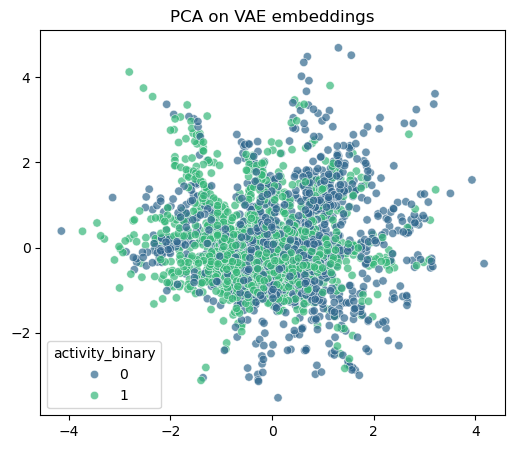

In [24]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_vae_scaled)

plt.figure(figsize=(6,5))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y_bin, palette="viridis", alpha=0.7)
plt.title("PCA on VAE embeddings")
plt.legend(title="activity_binary")
plt.show()


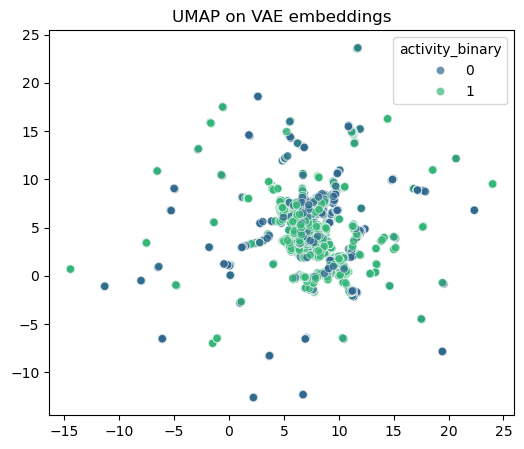

In [36]:
import umap

reducer = umap.UMAP(n_neighbors=15, min_dist=0.3, n_components=2, n_jobs=-1)
X_umap = reducer.fit_transform(X_vae_scaled)

plt.figure(figsize=(6,5))
sns.scatterplot(x=X_umap[:,0], y=X_umap[:,1], hue=y_bin, palette="viridis", alpha=0.7)
plt.title("UMAP on VAE embeddings")
plt.legend(title="activity_binary")
plt.show()


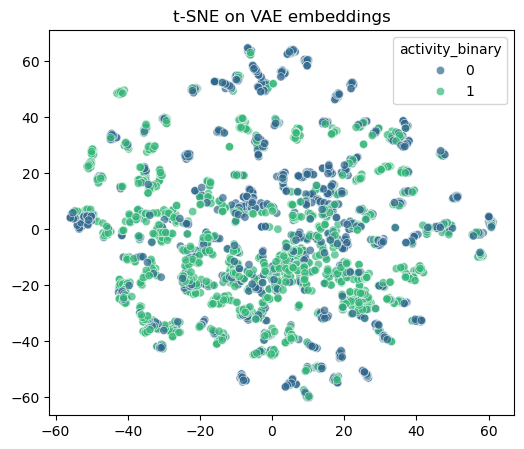

In [31]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, learning_rate="auto", init="pca", perplexity=30, n_jobs=-1)
X_tsne = tsne.fit_transform(X_vae_scaled)

plt.figure(figsize=(6,5))
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=y_bin, palette="viridis", alpha=0.7)
plt.title("t-SNE on VAE embeddings")
plt.legend(title="activity_binary")
plt.show()


# EvolvePro

In [47]:
from scripts.dms.dms_main import grid_search


grid_search(
    dataset_name='ube2i',
    experiment_name='vae_latent',
    model_name='vae_latent',
    embeddings_path='../data/output/ube2i/embeddings',
    labels_path='../data/output/ube2i',
    num_simulations=3,
    num_iterations=[10],
    measured_var=['activity'],
    learning_strategies=['topn'],
    num_mutants_per_round=[16],
    num_final_round_mutants=16,
    first_round_strategies=['random'],
    embedding_types=['embeddings'],
    pca_components=None,
    regression_types=['randomforest'],
    embeddings_file_type='csv',
    output_dir='../data/output/ube2i/dms_results_ube2i',
    embeddings_type_pt=None,
)

Embeddings and labels are aligned
Total combinations: 1
Starting labels length: 3021
Starting non-wt length: 3021
iterations considered:    variant  iteration
0      M1L          0
1    L113K          0
2    N121W          0
3    R149V          0
4    N121H          0
5    D100N          0
6     K76R          0
7     P69T          0
8     S71K          0
9     F77T          0
10   A129K          0
11    N31I          0
12    F24M          0
13    E98Q          0
14     G3A          0
15    F82R          0
16      WT          0
(3005,)
iterations considered:    variant  iteration
0    D100T          1
1    D100H          1
2    S158H          1
3    D100W          1
4    Q126P          1
5     A15Q          1
6    Q126E          1
7     Y68F          1
8     S70N          1
9    S158P          1
10   A106Q          1
11    T91A          1
12   Q126N          1
13   A131G          1
14    T91S          1
15   D100R          1
16     M1L          0
17   L113K          0
18   N121W        

Saved figure: ../data/output/ube2i/dms_plots_ube2i/ube2i_compare_activity_binary.png
Saved figure: ../data/output/ube2i/dms_plots_ube2i/ube2i_compare_median_activity.png
Saved figure: ../data/output/ube2i/dms_plots_ube2i/ube2i_compare_top_activity.png


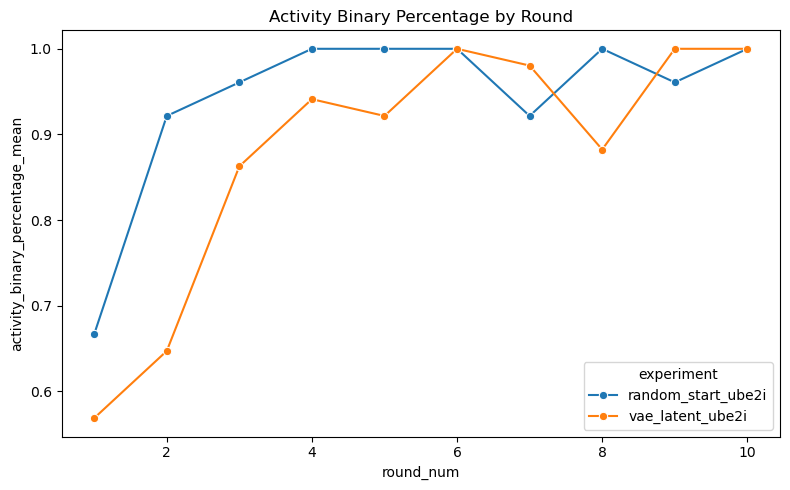

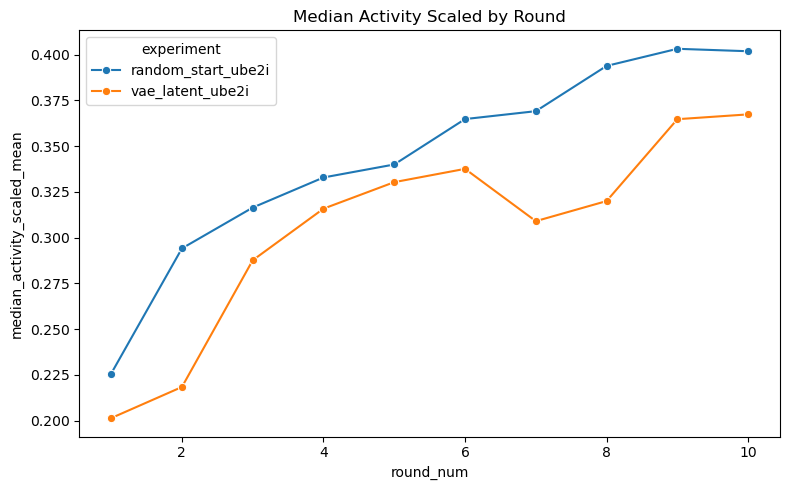

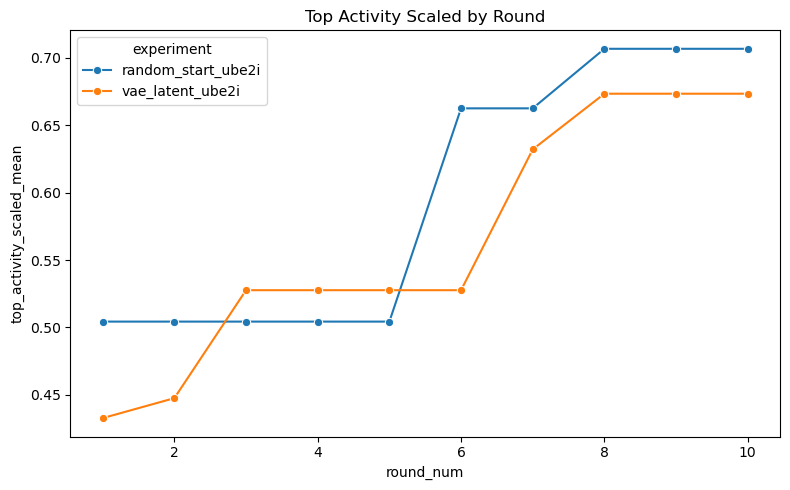

In [50]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def load_experiment_csv(file_path, dataset_name, experiment_name):
    df = pd.read_csv(file_path)
    df["dataset"] = dataset_name
    df["experiment"] = experiment_name
    return df

def aggregate_by_experiment_and_round(df, group_cols=("experiment", "round_num"), agg_cols=("activity_binary_percentage", "median_activity_scaled", "top_activity_scaled")):
    df = df.replace("None", pd.NA)
    for col in agg_cols:
        df[col] = pd.to_numeric(df[col], errors="coerce")
    grouped = df.groupby(list(group_cols))[list(agg_cols)].mean()
    df_agg = grouped.reset_index()
    df_agg.rename(columns={"activity_binary_percentage": "activity_binary_percentage_mean", "median_activity_scaled": "median_activity_scaled_mean", "top_activity_scaled": "top_activity_scaled_mean"}, inplace=True)
    return df_agg

def plot_line_by_round(df, x_col, y_col, hue_col="experiment", title="", output_dir=".", output_file=""):
    plt.figure(figsize=(8, 5))
    sns.lineplot(data=df, x=x_col, y=y_col, hue=hue_col, marker="o")
    plt.title(title)
    plt.tight_layout()
    if output_file:
        os.makedirs(output_dir, exist_ok=True)
        save_path = os.path.join(output_dir, output_file)
        plt.savefig(save_path, dpi=300)
        print(f"Saved figure: {save_path}")
    else:
        plt.show()

def main():
    data_dir = "../data/output/ube2i/dms_results_ube2i"
    output_dir = "../data/output/ube2i/dms_plots_ube2i"
    csv_onehot = os.path.join(data_dir, "ube2i_vae_latent_vae_latent.csv")
    csv_random = os.path.join(data_dir, "ube2i_esm2_t36_3B_UR50D_random_start_ube2i.csv")
    df_onehot = load_experiment_csv(csv_onehot, "ube2i", "vae_latent_ube2i")
    df_random = load_experiment_csv(csv_random, "ube2i", "random_start_ube2i")
    df_all = pd.concat([df_onehot, df_random], ignore_index=True)
    df_agg = aggregate_by_experiment_and_round(df_all)
    plot_line_by_round(df_agg, "round_num", "activity_binary_percentage_mean", "experiment", "Activity Binary Percentage by Round", output_dir, "ube2i_compare_activity_binary.png")
    plot_line_by_round(df_agg, "round_num", "median_activity_scaled_mean", "experiment", "Median Activity Scaled by Round", output_dir, "ube2i_compare_median_activity.png")
    plot_line_by_round(df_agg, "round_num", "top_activity_scaled_mean", "experiment", "Top Activity Scaled by Round", output_dir, "ube2i_compare_top_activity.png")

if __name__ == "__main__":
    main()
